
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - Multilayer Perceptron <br>
<font color=696880 size=4>
Sina Namazi


____

## Personal Data

Please fill in your details below to help us keep track of your submission.

In [1]:
student_number = '401106696'
Name = 'Keyhan'
Last_Name = 'Hodaei'

## Libraries

In [2]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms

## Introduction:

In this Notebook, we introduce the fundamental concepts of neural networks, focusing specifically on the architecture and functionality of Multilayer Perceptrons (MLPs). MLPs are a class of feedforward artificial neural networks that consist of multiple layers of nodes, each layer fully connected to the next. These networks are widely used for a variety of machine learning tasks, including classification and regression. The core idea behind MLPs is to learn complex functions by adjusting the weights and biases of the network through a process known as training, typically involving backpropagation and an optimization algorithm like gradient descent.


To provide a practical context to these concepts, we will be working with the MNIST dataset, a large collection of handwritten digits commonly used for training and testing in the field of machine learning. The dataset consists of 60,000 training images and 10,000 test images, each being a 28x28 pixel grayscale image of digits ranging from 0 to 9. The simplicity and size of the MNIST dataset make it an excellent choice for exploring and understanding the mechanics of neural networks, particularly in recognizing patterns and classifying images. Throughout this notebook, we will apply MLPs to this dataset, exploring every step of the process from data preparation and exploration to model training and evaluation.

## Getting the Data


The following Python cell performs two primary actions: it loads the MNIST dataset and then splits it into two distinct sets - one for training and one for testing. 

- `X_train, Y_train`: These variables represent the training set. `X_train` contains the images of handwritten digits, and `Y_train` contains the corresponding labels that indicate the actual digit each image represents (0 through 9).
- `X_test, Y_test`: Similarly, these variables represent the test set. `X_test` includes the images reserved for testing the model's performance, while `Y_test` contains the labels for these images.

By executing the next cell, you will download the dataset and prepare these variables.

**There is no need to change the following cell.**


In [3]:
# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

X_train_torch = trainset.data
Y_train_torch = trainset.targets

X_test_torch = testset.data
Y_test_torch = testset.targets



# Training Images:
X_train = X_train_torch.numpy()
# Training Labels:
Y_train = Y_train_torch.numpy()

# Test Images:
X_test = X_test_torch.numpy()
# Test Labels:
Y_test = Y_test_torch.numpy()

## Exploratory Data Analysis: (5 Points)

Before diving into model building, it's crucial to perform an exploratory data analysis (EDA) to understand the characteristics and structure of the dataset at hand. EDA involves visualizing the data, identifying patterns, understanding the distribution of variables, and spotting any anomalies or outliers. This step not only helps in making informed decisions about data preprocessing and model design but also provides insights that could be useful for feature engineering.

Here are two examples of EDA for the MNIST dataset, which consists of handwritten digits:

1. **Visualizing Sample Images**:
   - Display a few sample images from the dataset to get a sense of what the handwritten digits look like. This can help in understanding the variety of handwriting styles and the clarity of images.

</br>

2. **Checking the Distribution of Classes**:
   - Plot the frequency of each digit (0-9) in the dataset to check if the dataset is balanced. This is crucial as an imbalanced dataset may need special treatment during training, such as class weighting or resampling techniques.

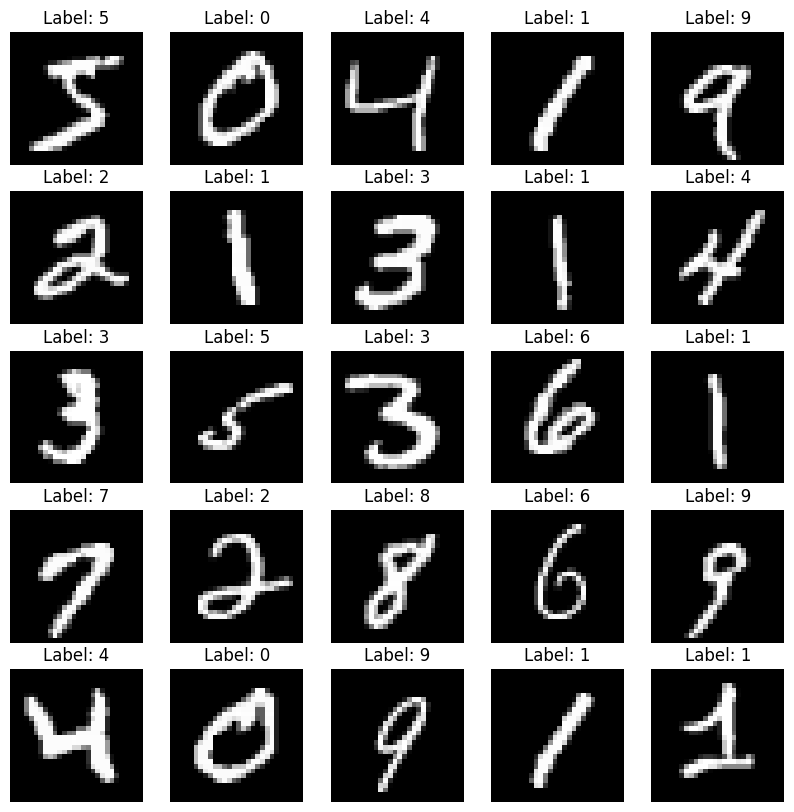

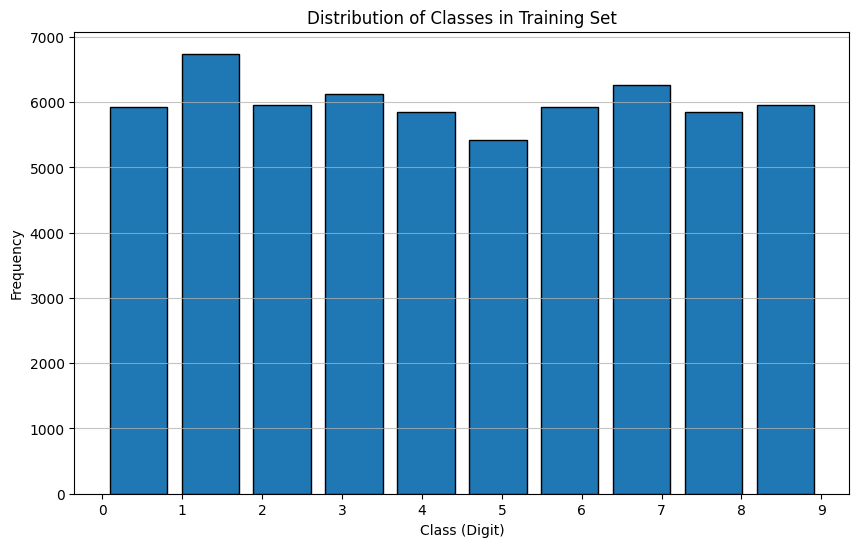

In [4]:
# Exploratory data analysis
# Visualizing sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {Y_train[i]}')
    plt.axis('off')
plt.show()

# Checking the distribution of classes
plt.figure(figsize=(10, 6))
plt.hist(Y_train, bins=10, edgecolor='black', align='mid', rwidth=0.8)
plt.title('Distribution of Classes in Training Set')
plt.xlabel('Class (Digit)')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.75)
plt.show()

## Data Split: (5 Points)

To evaluate the performance of our MLP model effectively, we divide the dataset into three distinct sets: training, validation, and test sets. The training set is used to train the model, where the model learns to make predictions by adjusting its parameters. The validation set is used to fine-tune the hyperparameters and make informed decisions about the model architecture without overfitting to the training data. Finally, the test set is utilized to assess the model's performance on unseen data, providing an unbiased evaluation of its ability to generalize.

In the next cell, you should take the initial training set `(X_train, Y_train)` and further split it into validation `(X_val, Y_val)` and revised training sets `(X_train, Y_train)` using a 1:5 ratio. This process ensures that we have a separate dataset to validate the model's performance during the training phase, helping us to avoid overfitting and ensuring that our model generalizes well to new, unseen data.

In [5]:
# Train, Validation, Test split
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=1/6, random_state=42)

## Preparation of the Data:

Data preparation is a critical step in the machine learning pipeline. This process includes cleaning the data, handling missing values, normalizing or standardizing the data, and reshaping it into a format suitable for the neural network. Proper data preparation ensures that the model learns effectively and achieves high performance.

In the next cell, we will focus on preparing the MNIST dataset for our MLP model. Given that the MNIST images are grayscale with pixel values ranging from 0 to 255, we will start by normalizing these values to a range of 0 to 1. This normalization helps in speeding up the convergence of the neural network by providing a consistent scale of input values. Additionally, we will reshape the images from their original 2D shape (28x28 pixels) into a flat 1D vector of 784 elements. This step is necessary because our MLP model expects input vectors of a fixed size.

**There is no need to change the following cell.**


In [6]:
# Normalize the images
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

## Preparation of Model Parameters:

Initializing the parameters of an MLP, including weights and biases, is an important step that can significantly affect the model's learning process. Proper initialization can help in preventing issues related to vanishing or exploding gradients, thereby ensuring a stable and efficient training process.

In the next cell, we define the architecture of our neural network and initialize its weights and biases. Our network consists of an input layer, three hidden layers, and an output layer, structured as follows:

- `n_inp`: Represents the number of neurons in the input layer, determined by the number of features in `X_train`.
- `n_hid1`, `n_hid2`, `n_hid3`: Denote the number of neurons in the first, second, and third hidden layers, respectively, set to 256, 128, and 64 for a progressively narrowing architecture.
- `n_out`: The number of neurons in the output layer, set to 10, corresponding to the number of possible classifications (for example, digits 0-9 in the MNIST dataset).

For each layer, we initialize the weights and biases as follows:
- `W1`, `W2`, `W3`, `W4`: Weight matrices for the first, second, third, and output layers, initialized with small random values drawn from a normal distribution, scaled by 0.01 to keep the values small.
- `B1`, `B2`, `B3`, `B4`: Bias vectors for each layer, also initialized with small random values, similarly scaled.

A random seed (`manual_seed(42)`) is set for reproducibility, ensuring that the random numbers generated are the same each time the code is run. This aids in debugging and comparing model performances across different runs.

**There is no need to change the following cell.**

In [7]:
# Defining the Sizes of the Layers
n_inp = X_train.shape[1]
n_hid1 = 256
n_hid2 = 128
n_hid3 = 64
n_out = 10

# Seed for Reproducibility
g = torch.Generator().manual_seed(42)

# Weights and Biases of the First Layer:
W1 = torch.randn(n_inp, n_hid1, generator=g, requires_grad=True) * 0.01
B1 = torch.randn(1, n_hid1, generator=g, requires_grad=True) * 0.01

# Weights and Biases of the Second Layer:
W2 = torch.randn(n_hid1, n_hid2, generator=g, requires_grad=True) * 0.01
B2 = torch.randn(1, n_hid2, generator=g, requires_grad=True) * 0.01

# Weights and Biases of the Third Layer:
W3 = torch.randn(n_hid2, n_hid3, generator=g, requires_grad=True) * 0.01
B3 = torch.randn(1, n_hid3, generator=g, requires_grad=True) * 0.01

# Weights and Biases of the Fourth Layer:
W4 = torch.randn(n_hid3, n_out, generator=g, requires_grad=True) * 0.01
B4 = torch.randn(1, n_out, generator=g, requires_grad=True) * 0.01

## Forward Pass:

The forward pass refers to the computation process where the input data is passed through the network layer by layer to produce the output. At each layer, the input is transformed using a linear transformation (weighted sum followed by the addition of a bias term) and then typically passed through a non-linear activation function. The output of the final layer is considered the prediction of the network. This step is crucial for both training and evaluation of the model.

In the next cell, we will illustrate the forward pass using our MLP model designed for the MNIST dataset. We will walk through the process step by step, starting with the input layer, moving through the hidden layers, and finally to the output layer. For each layer, we will apply the linear transformation, followed by an activation function for hidden layers. The final layer will use the softmax function to produce a probability distribution over the 10 possible digit classes.


Here's a step-by-step breakdown:

- `batch_size = 32`: This specifies the number of training examples to process simultaneously, which affects the efficiency of training and the generalization capability of the model.

**Layer 1:**
- `PreActivation1`: Result of the linear transformation applied to the input, computed as `sample_inp @ W1 + B1`, resulting in dimensions `[batch_size, n_hid1]`.
- `Hidden1`: Output after applying the sigmoid activation function to `PreActivation1`, maintaining dimensions `[batch_size, n_hid1]`.

**Layer 2:**
- `PreActivation2`: Linear transformation for the second layer, using `Hidden1` as input, resulting in dimensions `[batch_size, n_hid2]`.
- `Hidden2`: Output after applying the ReLU activation function to `PreActivation2`, with dimensions `[batch_size, n_hid2]`.

**Layer 3:**
- `PreActivation3`: Linear transformation for the third layer, with dimensions `[batch_size, n_hid3]`.
- `Hidden3`: Output after applying the tanh activation function to `PreActivation3`, maintaining dimensions `[batch_size, n_hid3]`.

**Layer 4 (Output Layer):**
- `Logits`: Result of the final linear transformation applied to `Hidden3`, with dimensions `[batch_size, n_out]`, where `n_out` is the number of output classes.
- `Probs`: Probabilities for each class, obtained by applying the softmax function to `Logits`, with dimensions `[batch_size, n_out]`. The softmax ensures these probabilities sum to 1 for each sample.

**Loss Computation:**
- `LogProbs`: Logarithm of `Probs`, necessary for computing cross-entropy loss, maintaining dimensions `[batch_size, n_out]`.
- `Loss`: The cross-entropy loss for the batch, calculated by taking the negative log likelihood of the correct class probabilities (indexed by `sample_out`) and averaging, resulting in a single scalar value. This metric quantifies the model's prediction accuracy, guiding parameter adjustments during training.

**There is no need to change the following cell.**



In [8]:
batch_size = 32
sample_inp = torch.Tensor(X_train[:batch_size])
sample_out = torch.Tensor(Y_train[:batch_size]).int()

# Forward pass

# Layer 1
# Applying Linear transformation
PreActivation1 = sample_inp @ W1 + B1
# Applying Sigmoid activation function
Hidden1 = torch.sigmoid(PreActivation1)

# Layer 2
# Applying Linear transformation
PreActivation2 = Hidden1 @ W2 + B2
# Applying ReLU activation function
Hidden2 = torch.relu(PreActivation2)

# Layer 3
# Applying Linear transformation
PreActivation3 = Hidden2 @ W3 + B3
# Applying Tanh activation function
Hidden3 = torch.tanh(PreActivation3)


# Layer 4
# Applying Linear transformation
Logits = Hidden3 @ W4 + B4
# Applying Softmax activation function
Exp4 = torch.exp(Logits)
Sum4 = torch.sum(Exp4, dim=1).view(-1, 1)
SumInverse4 = 1 / Sum4
Probs = Exp4 * SumInverse4

# Loss computation (Cross-entropy loss)
LogProbs = Probs.log()
Loss = -LogProbs[range(batch_size), sample_out].mean()

## Backward Pass and Gradient Computation:

Following the forward pass, the next critical phase in training a neural network is the backward pass, which involves computing the gradients of the loss function with respect to each parameter in the model. This process, often facilitated by automatic differentiation libraries like PyTorch's `autograd`, allows us to understand how each parameter needs to be adjusted to minimize the loss.

In the next cell, we will compute the gradients of our model using `autograd` and save all the values as numpy arrays.




Here's a breakdown of the variables in the code:

- **`parameters`:** A list containing all the trainable parameters of the network, including the weights (`W1`, `W2`, `W3`, `W4`) and biases (`B1`, `B2`, `B3`, `B4`) of each layer.

- **`middle_values`:** A list of intermediate values computed during the forward pass. These include pre-activation values (`PreActivation1`, `PreActivation2`, `PreActivation3`), hidden layer outputs (`Hidden1`, `Hidden2`, `Hidden3`), and other intermediate computations (`Logits`, `Exp4`, `Sum4`, `SumInverse4`, `Probs`, `LogProbs`) crucial for the loss calculation.

- **Weights (`W1`, `W2`, `W3`, `W4`):** These matrices represent the wights of different layers of our model saved as NumPy arrays.

- **Biases (`B1`, `B2`, `B3`, `B4`):** These matrices represent the biases of different layers of our model saved as NumPy arrays.

- **Weight Gradients (`W1_grad`, `W2_grad`, `W3_grad`, `W4_grad`):** After the backward pass, `W1_grad` holds the gradients of the loss function with respect to `W1`, and similarly for the other weight matrices. All these matrices are saved as NumPy arrays.

- **Bias Gradients (`B1_grad`, `B2_grad`, `B3_grad`, `B4_grad`):** Similar to weight gradients, these vectors contain the gradients of the loss with respect to the biases. `B1_grad` is associated with the biases of the first hidden layer, `B2_grad` with the second, and so on. All these vectors are saved as NumPy arrays.

**There is no need to change the following cell.**


In [9]:
parameters = [W1, B1, W2, B2, W3, B3, W4, B4]

middle_values = [PreActivation1, Hidden1,
                 PreActivation2, Hidden2,
                 PreActivation3, Hidden3,
                 Logits, Exp4, Sum4, SumInverse4, Probs, 
                 LogProbs]

# Backward pass (autograd)
for p in parameters:
    p.grad = None
    p.retain_grad()
for m in middle_values:
    m.retain_grad()
Loss.backward()

Loss = np.array(Loss.detach())

LogProbs_grad = np.array(LogProbs.grad)
LogProbs = np.array(LogProbs.detach())

Probs_grad = np.array(Probs.grad)
Probs = np.array(Probs.detach())

SumInverse4_grad = np.array(SumInverse4.grad)
SumInverse4 = np.array(SumInverse4.detach())

Sum4_grad = np.array(Sum4.grad)
Sum4 = np.array(Sum4.detach())

Exp4_grad = np.array(Exp4.grad)
Exp4 = np.array(Exp4.detach())

Logits_grad = np.array(Logits.grad)
Logits = np.array(Logits.detach())

B4_grad = np.array(B4.grad)
B4 = np.array(B4.detach())

W4_grad = np.array(W4.grad)
W4 = np.array(W4.detach())

Hidden3_grad = np.array(Hidden3.grad)
Hidden3 = np.array(Hidden3.detach())

PreActivation3_grad = np.array(PreActivation3.grad)
PreActivation3 = np.array(PreActivation3.detach())

B3_grad = np.array(B3.grad)
B3 = np.array(B3.detach())

W3_grad = np.array(W3.grad)
W3 = np.array(W3.detach())

Hidden2_grad = np.array(Hidden2.grad)
Hidden2 = np.array(Hidden2.detach())

PreActivation2_grad = np.array(PreActivation2.grad)
PreActivation2 = np.array(PreActivation2.detach())

B2_grad = np.array(B2.grad)
B2 = np.array(B2.detach())

W2_grad = np.array(W2.grad)
W2 = np.array(W2.detach())

Hidden1_grad = np.array(Hidden1.grad)
Hidden1 = np.array(Hidden1.detach())

PreActivation1_grad = np.array(PreActivation1.grad)
PreActivation1 = np.array(PreActivation1.detach())

B1_grad = np.array(B1.grad)
B1 = np.array(B1.detach())

W1_grad = np.array(W1.grad)
W1 = np.array(W1.detach())

sample_inp = np.array(sample_inp)
sample_out = np.array(sample_out)

## Manual Gradient Calculation by Chain Rule: (50 Points)

The chain rule is a fundamental principle in calculus that facilitates the computation of complex derivatives by breaking them down into simpler parts. In the context of neural networks, the chain rule enables the efficient calculation of gradients of the loss function with respect to any parameter in the network, regardless of its position. This process is crucial for understanding how changes in parameters affect the overall loss, guiding the optimization process towards lower loss values.

In the next cells, we will start a hands-on exploration of this concept by manually calculating the gradients for selected parts of our model. This exercise will not only deepen your understanding of backpropagation  but also reinforce the mathematical intuition behind the learning process.

We will proceed as follows:

1. **Identify Key Operations:** We will start by pinpointing the key operations in our model that contribute to the final prediction. This includes linear transformations, activation functions, and the final loss computation.
   
2. **Compute Local Gradients:** For each operation, we will compute the local gradient, which represents the rate of change of the operation's output with respect to its input.

3. **Apply the Chain Rule:** Using the chain rule, we will then piece together these local gradients to compute the gradient of the loss function with respect to each parameter in our model. This involves multiplying the local gradients along the paths from the output back to each parameter.

4. **Verify Your Calculations:** Finally, we will compare our manually computed gradients with those obtained using automatic differentiation (e.g., PyTorch's `autograd`), ensuring the correctness of our computations. For example `dLogProbs` that you manualy calculate should be equal to the `LogProbs_grad` that we calculated before using PyTorch's autograd and we will verify that by `check()` function.


**HINT:** As you start doing manual gradient calculation, keep in mind that the gradient of any parameter or intermediate variable should retain the same dimensions as the original array.

Additionally, all calculations in this exercise **should be performed using NumPy** and its functions.

**Please complete the #TODO parts of the following cells**



In [10]:
# Function to compare manually computed gradients with PyTorch (autograd) gradients
def check(s, manual_grad, autograd_grad):
  corrcetness = np.allclose(manual_grad, autograd_grad)
  print(f'{s:15s} | Gradient Correctness: {str(corrcetness):5s}')

In [11]:
# Backward pass (manual)
# Loss
# TODO
dLogProbs = np.zeros(10 * batch_size).reshape(batch_size, 10)
for i in range(batch_size):
    dLogProbs[i, sample_out[i]] = -1 / batch_size

# Verify the correctness of the gradients that you calculated
check('LogProbs', dLogProbs, LogProbs_grad)

LogProbs        | Gradient Correctness: True 


In [12]:
# Backward pass (manual)
# Layer 4

# TODO
dProbs = dLogProbs / Probs

# TODO
dSumInverse4 = np.sum(dProbs * Exp4, axis=1).reshape(-1, 1)

# TODO
dSum4 = -dSumInverse4 / Sum4**2

# TODO
dExp4 = dSum4 + dProbs / Sum4

# TODO
dLogits = Exp4 * dExp4

# TODO
dB4 = dLogits.sum(axis=0)

# TODO
dW4 = Hidden3.T @ dLogits

# TODO
dHidden3 = dLogits @ W4.T


# Verify the correctness of the gradients that you calculated
check('Probs', dProbs, Probs_grad)
check('SumInverse4', dSumInverse4, SumInverse4_grad)
check('Sum4', dSum4, Sum4_grad)
check('Exp4', dExp4, Exp4_grad)
check('Logits', dLogits, Logits_grad)
check('B4', dB4, B4_grad)
check('W4', dW4, W4_grad)
check('Hidden3', dHidden3, Hidden3_grad)

Probs           | Gradient Correctness: True 
SumInverse4     | Gradient Correctness: True 
Sum4            | Gradient Correctness: True 
Exp4            | Gradient Correctness: True 
Logits          | Gradient Correctness: True 
B4              | Gradient Correctness: True 
W4              | Gradient Correctness: True 
Hidden3         | Gradient Correctness: True 


In [13]:
# Backward pass (manual)
# Layer 3

# TODO
dPreActivation3 = 1 / np.cosh(PreActivation3)**2 * dHidden3

# TODO
dB3 = dPreActivation3.sum(axis=0)

# TODO
dW3 = Hidden2.T @ dPreActivation3

# TODO
dHidden2 = dPreActivation3 @ W3.T


# Verify the correctness of the gradients that you calculated
check('PreActivation3', dPreActivation3, PreActivation3_grad)
check('B3', dB3, B3_grad)
check('W3', dW3, W3_grad)
check('Hidden2', dHidden2, Hidden2_grad)

PreActivation3  | Gradient Correctness: True 
B3              | Gradient Correctness: True 
W3              | Gradient Correctness: True 
Hidden2         | Gradient Correctness: True 


In [14]:
# Backward pass (manual)
# Layer 2

# TODO
dPreActivation2 = dHidden2.copy()
dPreActivation2[PreActivation2 < 0] = 0

# TODO
dB2 = dPreActivation2.sum(axis=0)

# TODO
dW2 = Hidden1.T @ dPreActivation2

# TODO
dHidden1 = dPreActivation2 @ W2.T


# Verify the correctness of the gradients that you calculated
check('PreActivation2', dPreActivation2, PreActivation2_grad)
check('B2', dB2, B2_grad)
check('W2', dW2, W2_grad)
check('Hidden1', dHidden1, Hidden1_grad)

PreActivation2  | Gradient Correctness: True 
B2              | Gradient Correctness: True 
W2              | Gradient Correctness: True 
Hidden1         | Gradient Correctness: True 


In [15]:
# Backward pass (manual)
# Layer 1

# TODO
dPreActivation1 = dHidden1 * Hidden1 * (1 - Hidden1)

# TODO
dB1 = dPreActivation1.sum(axis=0)

# TODO
dW1 = sample_inp.T @ dPreActivation1


# Verify the correctness of the gradients that you calculated
check('PreActivation1', dPreActivation1, PreActivation1_grad)
check('B1', dB1, B1_grad)
check('W1', dW1, W1_grad)

PreActivation1  | Gradient Correctness: True 
B1              | Gradient Correctness: True 
W1              | Gradient Correctness: True 


## Updating Model Parameters: (5 Points)

With the gradients computed during the backpropagation step, the next critical phase in training our neural network involves updating the model's parameters. This step is essential for minimizing the loss function and improving the model's predictions over time.

For our model, this translates to the following updates:
- For the first layer's weights (`W1`) and biases (`B1`), we subtract the product of the learning rate and their respective gradients (`dW1`, `dB1`).
- Similarly, this pattern is repeated for the subsequent layers' weights (`W2`, `W3`, `W4`) and biases (`B2`, `B3`, `B4`), ensuring that each parameter is nudged in the direction that minimizes the loss.

**Please complete the #TODO parts of the following cell**

In [16]:
# Update parameters
# TODO
learning_rate = 0.01

# TODO
W1 -= learning_rate * dW1
B1 -= learning_rate * dB1

# TODO
W2 -= learning_rate * dW2
B2 -= learning_rate * dB2

# TODO
W3 -= learning_rate * dW3
B3 -= learning_rate * dB3

# TODO
W4 -= learning_rate * dW4
B4 -= learning_rate * dB4

## Activation Functions Using Numpy Instead of PyTorch: (10 Points)

In the next phase of this notebook, we will try to implement a complete multilayer perceptron (MLP) model using only the NumPy library. For this purpose, you should implement the following activation functions using only NumPy functions:

- **Sigmoid:**
  The Sigmoid function is defined as \( \sigma(x) = \frac{1}{1 + e^{-x}} \). It maps any input value to a value between 0 and 1.

- **ReLU:**
  The Rectified Linear Unit (ReLU) function is defined as \( \text{ReLU}(x) = \max(0, x) \). It introduces non-linearity with less computational complexity and has become one of the most popular activation functions in deep learning.

- **Tanh:**
  The Hyperbolic Tangent (Tanh) function is defined as \( \tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} \). It maps any input value to a range between -1 and 1.

**Please complete the #TODO parts of the following cells**


In [17]:
# Activation functions

def sigmoid(x):
    """
    Compute the sigmoid function for the input array.

    Parameters:
    - x (np.array): The input array for which to compute the sigmoid function.

    Returns:
    - np.array: The output array where the sigmoid function has been applied element-wise.
    """
    return 1 / (1 + np.exp(-x))

def relu(x):
    """
    Compute the Rectified Linear Unit (ReLU) for the input array.

    Parameters:
    - x (np.array): The input array for which to compute the ReLU function.

    Returns:
    - np.array: The output array where the ReLU function has been applied element-wise, keeping only positive values and setting negative values to zero.
    """
    return np.maximum(0, x)

def tanh(x):
    """
    Compute the hyperbolic tangent (tanh) for the input array.

    Parameters:
    - x (np.array): The input array for which to compute the tanh function.

    Returns:
    - np.array: The output array where the tanh function has been applied element-wise.
    """
    return np.tanh(x)

## Writing the MLP Class: (10 Points)

In the next cell, you are tasked with completing the MLP class, which will serve as the foundation for training an MLP model on the MNIST dataset. The class should have the essential components of an MLP, including:

- **Initialization of Parameters:** Define the architecture (number of layers, size of each layer) and initialize the weights and biases accordingly. This sets up the structure of your neural network and prepares it for the forward and backward passes. You can use NumPy random functions for this purpose.

- **Forward Pass Method:** Implement the forward propagation algorithm to compute the output of the network for a given input. This involves applying a series of linear transformations and non-linear activations to the input data to obtain the final output. You are free to choose the size of the layers and also the activation functions

- **Loss Computation:** Calculate the loss to evaluate how well the model is performing. The loss function measures the discrepancy between the predicted outputs and the actual targets, guiding the training process. Use Cross-entropy loss for this example.

- **Backward Pass Method:** Compute the gradients of the loss with respect to the parameters **manually**.

- **Step Method:**
  The step method is responsible for updating the model's parameters (weights and biases) using the gradients computed after the backward pass. Typically, the step method will iterate over all parameters and apply the update:
  \[ \text{parameter} = \text{parameter} - (\text{learning_rate} \times \text{gradient}) \]



Feel free to design the architecture of your model, select appropriate hyperparameters, and choose activation functions based on your specific requirements and objectives! This flexibility allows you to tailor the model to optimally address your unique dataset and performance goals.


All calculations in this exercise **should be performed using NumPy** and its functions.

**Please complete the #TODO parts of the following cell**





In [18]:
class MLP:
    """
    A class representing a Multilayer Perceptron (MLP).

    Attributes:
        W1, W2, ... (np.ndarray): Weights for each layer.
        B1, B2, ... (np.ndarray): Biases for each layer.
        dW1, dW2, ... (np.ndarray): Gradients of weights for each layer during backpropagation.
        dB1, dB2, ... (np.ndarray): Gradients of biases for each layer during backpropagation.
        (You can add other attributes related to activations and gradients during forward and backward passes)

    Methods:
        forward(X): Performs the forward pass using the input X.
        Loss(Y): Computes the cross-entropy loss for the output compared to true labels Y.
        backward(X, Y): Performs the backward pass using the input X and labels Y to compute gradients.
        step(learning_rate): Updates the weights and biases according to the computed gradients and learning rate.
    """
    def __init__(self, n_inp, n_hid1, n_hid2, ..., n_hidN, n_out):
        """
        Initializes a new MLP instance with specified layer sizes.
        (Don't forget to initialize the intermediate values and their gradients as well!)
        
        Parameters:
            n_inp (int): Number of input neurons.
            n_hid1 (int): Number of neurons in the first hidden layer.
            n_hid2 (int): Number of neurons in the second hidden layer.
            .
            .
            .
            n_hidN (int): Number of neurons in the Nth hidden layer.
            n_out (int): Number of output neurons (typically the number of classes).
        """
        # TODO


    def forward(self, X):
        """
        Perform the forward pass through the network and return the probability of each class.

        Parameters:
            X (np.ndarray): Input data matrix, where each row represents a sample.

        Returns:
            np.ndarray: Probabilities of each class for each input sample.
        """
        # TODO
    

    def Loss(self, Y):
        """
        Compute the cross-entropy loss for the output of the network compared to the true labels.

        Parameters:
            Y (np.ndarray): True labels for the input data, where each entry is an index of the true class.

        Returns:
            float: The mean cross-entropy loss across all input samples.
        """
        # TODO
    

    def backward(self, X, Y):
        """
        Perform the backward pass using the input and labels to compute gradients for learning.

        Parameters:
            X (np.ndarray): Input data matrix, where each row represents a sample.
            Y (np.ndarray): True labels for the input data, where each entry is an index of the true class.

        Returns:
            None: This method updates class attributes corresponding to gradients.
        """
        # TODO


    def step(self, learning_rate):
        """
        Update the model's weights and biases based on the gradients computed during backpropagation.

        Parameters:
            learning_rate (float): The learning rate to use for the update step.

        Returns:
            None: This method updates the weights and biases of the MLP.
        """
        # TODO

SyntaxError: invalid syntax (3796769218.py, line 18)

## Setting the Hyperparameters and Model Configuration:

Hyperparameters, such as the learning rate, number of epochs, and batch size, play a crucial role in the training process and significantly influence the model's performance and efficiency. Unlike model parameters that are learned during training, hyperparameters must be predefined and can have a profound impact on the learning dynamics and final outcomes.

- **Learning Rate:** Determines the step size at each iteration while moving toward a minimum of the loss function. An appropriately chosen learning rate ensures that the model converges efficiently to a good solution.

- **Number of Epochs:** The total number of times the training dataset is passed through the network. Properly setting this value ensures that the model is adequately trained without falling into the pitfalls of underfitting or overfitting.

- **Batch Size:** Dictates the number of training examples used in one iteration. It balances the trade-off between the regularization effect and the stability of the gradient, also impacting memory usage and computational speed.

- **Model Size and Parameters:** Refers to the architecture of the MLP, including the number of layers and the number of neurons in each layer. The model's size directly affects its capacity to learn, with more parameters allowing for more complex functions to be modeled. However, larger models also require more data to train effectively without overfitting and entail higher computational costs. You could define this part in the previous cell as you wrote tha MLP class as well.

In the next cell, you will define these hyperparameters and configure the model's architecture.

**Please complete the #TODO parts of the following cell**


In [ ]:
# Setting the hyperparameters
# TODO
n_inp = 
n_hid1 = 
n_hid2 =
.
.
.
n_hidN =
n_out = 

batch_size = 
learning_rate =
n_epochs = 

## Creating Batches for Different Splits of Data (5 Points)

In the next cell, you should focus on batching the different splits of the MNIST dataset: the training, validation, and test sets.

Implementing this batching process will prepare your data for the training loop, where each batch will be fed into the model sequentially to perform forward and backward passes and update the model parameters.

**Please complete the #TODO parts of the following cell**


In [ ]:
# Creating batches
# TODO
training_batches = []


# TODO
validation_batches = []


# TODO
test_batches = []


## Writing the Training Loop (15 Points)

Training a neural network involves iteratively adjusting its parameters to minimize a loss function. This process is encapsulated within a training loop, where the model learns from the training data over multiple epochs. Each epoch represents one complete pass through the entire dataset.

In the next cell, you should do the following:

1. **Initialize the MLP Model:** Before you can start training, you need to instantiate your MLP class.

2. **Implement the Training Loop:** The training loop should include the following key steps for each epoch:
   - **Forward Pass:** For each batch of data, compute the model's predictions by passing the data through the model from input to output.
   - **Compute Loss:** Evaluate how well the model's predictions match the actual labels by calculating the loss, using a suitable loss function for classification (e.g., cross-entropy loss).
   - **Backward Pass:** Compute the gradients of the loss function with respect to the model's parameters.
   - **Update Parameters:** Adjust the model's parameters in the opposite direction of the gradients to minimize the loss.
   - **Validation:** Periodically, after a set number of epochs, evaluate the model's performance on the validation set to monitor its learning progress and adjust training parameters if necessary.

Remember to track the loss during training to monitor the model's performance over time. This information is valuable for debugging and optimizing the training process.

**Please complete the #TODO parts of the following cell**


In [ ]:
# Initialize the model
# TODO
mlp = 


# Training loop
# TODO


for epoch in range(n_epochs):

    for X, Y in training_batches:
        # Forward pass

        # Calculate the loss

        # Backward pass

        # Update the weights and biases
        
    
    for X, Y in validation_batches:
        # Forward pass

        # Calculate the loss
    

## Plotting the Validation and Training Loss (5 Points)

Visualizing the training and validation loss over time is a crucial aspect of the model development process. It provides valuable insights into how well the model is learning, helps identify issues such as overfitting or underfitting, and can guide decisions on model adjustments or hyperparameter tuning.

In the next cell, you will create a plot to visualize the training and validation loss over time.

**Please complete the #TODO parts of the following cell**

In [ ]:
# plot losses
# TODO


## Visualizing Some Examples (5 Points)

In the next cell, visualize a subset of the test images along with their true and predicted labels.

**Please complete the #TODO parts of the following cell**

In [ ]:
# Visualize test images
# TODO


## Calculating Model Metrics for Different Splits (15 Points)

Evaluating the performance of your MLP model across different data splits (training, validation, and test sets) is critical for understanding its generalization ability and overall effectiveness. This evaluation helps ensure that the model performs well not only on the data it was trained on but also on new, unseen data.

In the next cell, you should calculate model metrics(precision, recall, F1, ...) for each split and report them.

You can use sklearn library for this part, if you want to.

**Please complete the #TODO parts of the following cells**

In [ ]:
from sklearn.metrics import classification_report

# Training data metrics
# TODO


In [ ]:
# Validation data metrics
# TODO


In [ ]:
# Test data metrics
# TODO


## Reporting the Findings (5 Points)

In the next cell you should do the following:

1. **Analyze Results:** Compare the metrics across the different splits. A model that performs exceptionally well on the training set but poorly on the validation/test sets may be overfitting. Conversely, underfitting may be indicated by poor performance across all sets.

2. **Report Findings:** Summarize the results in a clear and concise manner.

### Your Explanation: